In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [5]:
# {'borough_encode': {'Bronx': 0, 'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Staten Island': 4}})

In [37]:
# import data
data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/main_dataset.csv')
data.head()

,borough,neighborhood,longitude,latitude,population,restaurant_count,N,bars,bbq,breakfast_brunch,...,store,subway_station,supermarket,synagogue,taxi_stand,tourist_attraction,transit_station,travel_agency,university,veterinary_care
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [7]:
data1 = data.copy()
data1 = data1.drop(columns='neighborhood', axis = 1)

onehot = pd.get_dummies(data[['borough', 'yelp_category']], prefix='', prefix_sep='')
data_numeric = data1.join(onehot)
data_numeric = data_numeric.drop(columns=['borough', 'yelp_category'], axis = 1)
data_numeric.head()

,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,Bronx,Brooklyn,Manhattan,...,pizza,russian,sandwiches,seafood,spanish,steak,sushi,tapasmallplates,thai,tradamerican
0,-73.847201,40.894705,21242.0,13,169,4.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-73.829939,40.874294,43752.0,12,771,4.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-73.827806,40.887556,11506.0,19,532,4.1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-73.905643,40.895437,9287.0,9,297,4.4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-73.912585,40.890834,9287.0,14,319,4.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [9]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

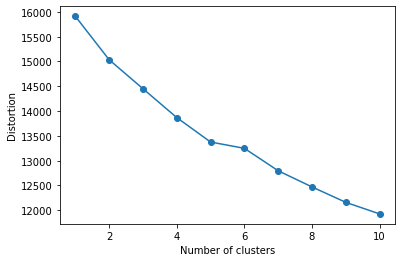

In [10]:
plot_distortion(data_scaled)

In [11]:
km = KMeans(n_clusters=5,
            n_init=10, 
            random_state=0)

In [12]:
y_km = km.fit_predict(data_scaled)

In [13]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

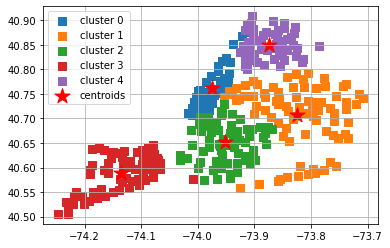

In [14]:
plot_clusters(np.array(data_numeric), y_km, plt_cluster_centers= True)

In [30]:
# data to radar chart
df_radar = data_numeric.groupby('cluster').mean().divide(data_numeric.drop('cluster',axis=1).mean())*100

In [31]:
# function that plots radar chart
def plot_radarchart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster{df.index[i]}',
                                    fill = 'toself'))

    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [25]:
cluster_list = y_km.tolist()
d2 = data.copy()
d2['cluster'] = cluster_list

In [34]:
plot_radarchart(df_radar)

In [29]:
d2[['borough', 'cluster']][50:100]

,borough,cluster
50,Brooklyn,2
51,Brooklyn,2
52,Brooklyn,2
53,Brooklyn,2
54,Brooklyn,2
55,Brooklyn,2
56,Brooklyn,2
57,Brooklyn,2
58,Brooklyn,2
59,Brooklyn,2


## Method 2

In [15]:
data.head()

,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers


In [16]:
categorical_features_idx = [0, 1,9]
mark_array = data.values

In [17]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20)
kproto.fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 60, ncost: 17143807651.103607
Run: 1, iteration: 2/20, moves: 37, ncost: 13333320169.985111
Run: 1, iteration: 3/20, moves: 13, ncost: 12618992643.35569
Run: 1, iteration: 4/20, moves: 5, ncost: 12266192943.458601
Run: 1, iteration: 5/20, moves: 3, ncost: 12202934641.4161
Run: 1, iteration: 6/20, moves: 0, ncost: 12202934641.4161
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 58, ncost: 19992965602.42532
Run: 2, iteration: 2/20, moves: 35, ncost: 16844356455.758154
Run: 2, iteration: 3/20, moves: 37, ncost: 14282683266.75852
Run: 2, iteration: 4/20, moves: 23, ncost: 13568167078.231462
Run: 2, iteration: 5/20, moves: 11, ncost: 13447347767.474516
Run: 2, iteration: 6/20, moves: 7, 

KPrototypes(gamma=7085.339987306333, max_iter=20, n_clusters=5, verbose=2)

In [18]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['-73.94004214015266' '40.723291052442164' '122245.61538461539' '26.0'
  '418.84615384615387' '4.199999999999999' '1.7692307692307692'
  'Brooklyn' 'Bensonhurst' 'mexican']
 ['-73.91082189455453' '40.732221601951224' '24166.550561797754'
  '18.471910112359552' '409.0561797752809' '4.082022471910112'
  '1.5393258426966292' 'Queens' 'Arden Heights' 'italian']
 ['-73.91766775677144' '40.72705811511003' '43230.63265306123'
  '20.959183673469386' '464.18367346938777' '4.055102040816328'
  '1.6938775510204083' 'Brooklyn' 'Murray Hill' 'chinese']
 ['-73.98589960010025' '40.66753570428003' '9058.0' '13.037037037037036'
  '382.27407407407406' '3.9525925925925893' '1.637037037037037'
  'Staten Island' 'Bay Terrace' 'pizza']
 ['-73.91039610712275' '40.71515647302308' '72063.55' '21.5' '445.65'
  '4.110000000000001' '1.65' 'Queens' 'Astoria' 'caribbean']]


In [19]:
# Prediction
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [20]:
data1['cluster'] = list(clusters)

In [21]:
data1.head()

,borough,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category,cluster
0,Bronx,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean,1
1,Bronx,-73.829939,40.874294,43752.0,12,771,4.0,2,delis,2
2,Bronx,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean,3
3,Bronx,-73.905643,40.895437,9287.0,9,297,4.4,1,N,3
4,Bronx,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers,3


## Longitude and Latitude Only

In [22]:
data_numeric.head()

,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,Bronx,Brooklyn,Manhattan,...,pizza,russian,sandwiches,seafood,spanish,steak,sushi,tapasmallplates,thai,tradamerican
0,-73.847201,40.894705,21242.0,13,169,4.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-73.829939,40.874294,43752.0,12,771,4.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-73.827806,40.887556,11506.0,19,532,4.1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-73.905643,40.895437,9287.0,9,297,4.4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-73.912585,40.890834,9287.0,14,319,4.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
